In [1]:
import os, sys
currentdir = os.path.dirname(os.path.realpath(os.path.abspath("")))
scriptsdir = os.path.dirname(currentdir)
if scriptsdir not in sys.path:
    sys.path.append(scriptsdir)

from customscripts import configuration
from customscripts import utils

import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
raw_data = utils.get_raw_dataset_df()

print(f"Number of rows: {len(raw_data.index):,}")

Number of rows: 1,336


In [3]:
# Detect NA values
raw_data.isna().sum()

Classification               0
Year                         0
Period                       0
Period Desc.                 0
Aggregate Level              0
Is Leaf Code                 0
Trade Flow Code              0
Trade Flow                   0
Reporter Code                0
Reporter                    32
Reporter ISO              1336
Partner Code                 0
Partner                      0
Partner ISO               1336
2nd Partner Code          1336
2nd Partner               1336
2nd Partner ISO           1336
Customs Proc. Code        1336
Customs                   1336
Mode of Transport Code    1336
Mode of Transport         1336
Commodity Code               0
Commodity                    0
Qty Unit Code             1336
Qty Unit                  1336
Qty                       1336
Alt Qty Unit Code         1336
Alt Qty Unit              1336
Alt Qty                   1336
Netweight (kg)             568
Gross weight (kg)         1336
Trade Value (US$)            0
CIF Trad

According to the number of NAs found in the dataset, we could theoretically get rid of the following columns for this dataset:
- Reporter ISO
- Partner ISO
- 2nd Partner Code
- 2nd Partner
- 2nd Partner ISO
- Customs Proc. Code
- Customs
- Mode of Transport Code
- Mode of Transport
- Qty Unit Code
- Qty Unit
- Qty
- Alt Qty Unit Code
- Alt Qty Unit
- Alt Qty
- Gross Weight (kg)
- CIF Trade Value (US$)
- FOB Trade Value (US$)

However, for other datasets some of those values can be important. We will see. In the meantime, we can discard these columns.

In [4]:
data_no_junk = raw_data.dropna(axis=1, how="all")
data_no_junk.isna().sum()

Classification         0
Year                   0
Period                 0
Period Desc.           0
Aggregate Level        0
Is Leaf Code           0
Trade Flow Code        0
Trade Flow             0
Reporter Code          0
Reporter              32
Partner Code           0
Partner                0
Commodity Code         0
Commodity              0
Netweight (kg)       568
Trade Value (US$)      0
Flag                   0
dtype: int64

Let's now look into the columns values, maybe some of them have always the same value, and it doesn't matter if we keep them or not for now.

In [5]:
data_no_junk.describe()

,Year,Period,Aggregate Level,Is Leaf Code,Trade Flow Code,Reporter Code,Partner Code,Netweight (kg),Trade Value (US$),Flag
count,1336.0,1336.000000,1336.0,1336.0,1336.000000,1336.000000,1336.0,768.0,1.336000e+03,1336.0
mean,2020.0,202004.255988,0.0,0.0,1.958832,444.542665,0.0,0.0,1.159387e+10,0.0
std,0.0,2.316276,0.0,0.0,0.973328,249.556250,0.0,0.0,2.775398e+10,0.0
min,2020.0,202001.000000,0.0,0.0,1.000000,31.000000,0.0,0.0,1.763000e+03,0.0
25%,2020.0,202002.000000,0.0,0.0,1.000000,222.000000,0.0,0.0,2.146346e+08,0.0
50%,2020.0,202004.000000,0.0,0.0,2.000000,442.000000,0.0,0.0,1.641580e+09,0.0
75%,2020.0,202006.000000,0.0,0.0,2.000000,646.000000,0.0,0.0,7.792940e+09,0.0
max,2020.0,202009.000000,0.0,0.0,4.000000,894.000000,0.0,0.0,2.124369e+11,0.0


We can see that for the columns:
- Aggregate Level
- Is Leaf Code
- Partner Code
- Netweight (kg)
- Flag

They all have values set to zero. We can drop them!

In [6]:
data_no_junk = data_no_junk.loc[:, (data_no_junk != 0).any(axis=0)]

Argh, because the column `Netweight (kg)` has some NaN, it's not possible to drop by just detecting all zeros.
We'll just drop it manually then!

In [7]:
data_no_junk = data_no_junk.drop(columns=["Netweight (kg)"])

In [8]:
data_no_junk

,Classification,Year,Period,Period Desc.,Trade Flow Code,Trade Flow,Reporter Code,Reporter,Partner,Commodity Code,Commodity,Trade Value (US$)
0,HS,2020,202001,January 2020,1,Imports,31,Azerbaijan,World,TOTAL,All Commodities,720848443
1,HS,2020,202001,January 2020,2,Exports,31,Azerbaijan,World,TOTAL,All Commodities,2130205335
2,HS,2020,202002,February 2020,1,Imports,31,Azerbaijan,World,TOTAL,All Commodities,1065797181
3,HS,2020,202002,February 2020,2,Exports,31,Azerbaijan,World,TOTAL,All Commodities,1119162230
4,HS,2020,202003,March 2020,1,Imports,31,Azerbaijan,World,TOTAL,All Commodities,850318775
...,...,...,...,...,...,...,...,...,...,...,...,...
1331,HS,2020,202002,February 2020,3,Re-exports,894,Zambia,World,TOTAL,All Commodities,15622094
1332,HS,2020,202002,February 2020,4,Re-imports,894,Zambia,World,TOTAL,All Commodities,1763
1333,HS,2020,202003,March 2020,1,Imports,894,Zambia,World,TOTAL,All Commodities,494842783
1334,HS,2020,202003,March 2020,2,Exports,894,Zambia,World,TOTAL,All Commodities,505845321


Let's also look at how the dates are arranged. If possible, we would like to have a column for the year (which we have, `Year`) and a column for the month, with either the number of the month (eww), or the name of the month (Yee).

We can see that both `Period` and `Period desc.` offer us with one of the alternatives. It's easier to just remove the year from the `Period desc.` column and drop `Period` column, so that we are left with what we want! Let's do this.

In [9]:
data_no_junk = data_no_junk.drop(columns=["Period"])

In [10]:
data_no_junk = data_no_junk.replace({"Period Desc.": r"\s\d{4}$"}, {"Period Desc.": ""}, regex=True)

In [11]:
data_no_junk

,Classification,Year,Period Desc.,Trade Flow Code,Trade Flow,Reporter Code,Reporter,Partner,Commodity Code,Commodity,Trade Value (US$)
0,HS,2020,January,1,Imports,31,Azerbaijan,World,TOTAL,All Commodities,720848443
1,HS,2020,January,2,Exports,31,Azerbaijan,World,TOTAL,All Commodities,2130205335
2,HS,2020,February,1,Imports,31,Azerbaijan,World,TOTAL,All Commodities,1065797181
3,HS,2020,February,2,Exports,31,Azerbaijan,World,TOTAL,All Commodities,1119162230
4,HS,2020,March,1,Imports,31,Azerbaijan,World,TOTAL,All Commodities,850318775
...,...,...,...,...,...,...,...,...,...,...,...
1331,HS,2020,February,3,Re-exports,894,Zambia,World,TOTAL,All Commodities,15622094
1332,HS,2020,February,4,Re-imports,894,Zambia,World,TOTAL,All Commodities,1763
1333,HS,2020,March,1,Imports,894,Zambia,World,TOTAL,All Commodities,494842783
1334,HS,2020,March,2,Exports,894,Zambia,World,TOTAL,All Commodities,505845321


In [12]:
data_no_junk = data_no_junk.rename(columns={"Period Desc.": "Month"})

It's also possible to drop the `Trade Flow Code` column, as it doesn't give any more information than the `Trade Flow`. The same goes for the `Reporter Code`.

The `Classification` column for this specific dataset can be dropped, as well as `Commodity Code`,  `Commodity` and `Partner` (which is only the World).

In [13]:
data_no_junk = data_no_junk.drop(columns=["Classification", "Trade Flow Code", "Reporter Code", "Commodity Code", "Commodity", "Partner"])

In [14]:
# We can now import the clean data from the utils script. Neat!
data = utils.get_clean_comtrade()


In [15]:
data

,Year,Month,Trade Flow,Reporter,Trade Value (US$)
0,2020,January,Imports,Azerbaijan,720848443
1,2020,January,Exports,Azerbaijan,2130205335
2,2020,February,Imports,Azerbaijan,1065797181
3,2020,February,Exports,Azerbaijan,1119162230
4,2020,March,Imports,Azerbaijan,850318775
...,...,...,...,...,...
1331,2020,February,Re-exports,Zambia,15622094
1332,2020,February,Re-imports,Zambia,1763
1333,2020,March,Imports,Zambia,494842783
1334,2020,March,Exports,Zambia,505845321


<AxesSubplot:title={'center':'Trade Amount per month'}, xlabel='Month', ylabel='Trade Value (US$)'>

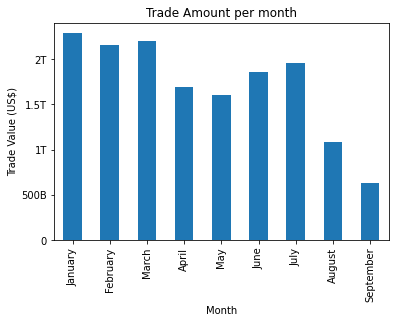

In [16]:
import matplotlib.ticker as ticker

fig, ax = plt.subplots()
# We want to see how much trade has occurred per each month, globally
data \
    .groupby("Month")["Trade Value (US$)"] \
    .sum() \
    .reindex(utils.get_2020_months()) \
    .plot(kind="bar", ax=ax, title="Trade Amount per month", ylabel="Trade Value (US$)")

formatter = ticker.FuncFormatter(utils.human_format)
ax.yaxis.set_major_formatter(formatter)

plt.show()

In [18]:
data \
    .groupby("Reporter")["Trade Value (US$)"] \
    .sum() \
    .sort_values(ascending=False) \
    .head(5)

Reporter
United States of America    2590200198280
EU-28                       2511265530637
Germany                     1604819753694
China, Hong Kong SAR         711109481524
Japan                        698012571883
Name: Trade Value (US$), dtype: int64

We can see how very few countries get to be on the top:  
1. United States  
2. Europe  
3. Germany  
4. Hong Kong  
5. Japan

Let's see then, all the countries that, for example, trade less than $50B

<AxesSubplot:title={'center':'Trade Value (US$) by Country'}, ylabel='Reporter'>

Text(0.5, 0, 'Trave Value (US$)')

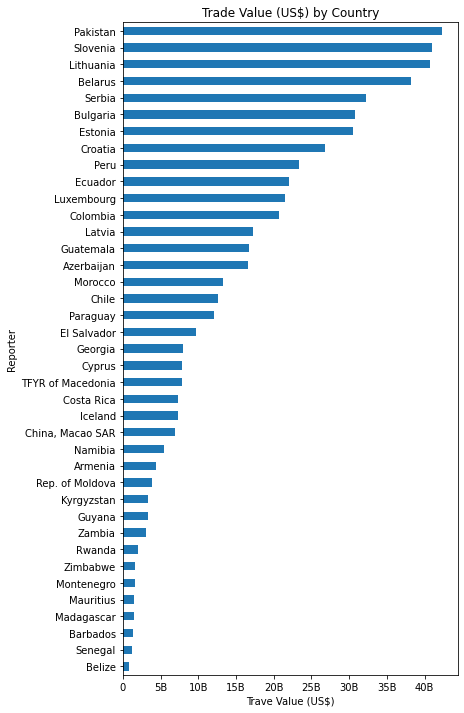

In [20]:
import matplotlib.ticker as ticker

fig, ax = plt.subplots()

data_lowest_50b = data \
    .groupby("Reporter")["Trade Value (US$)"] \
    .sum() \
    .where(lambda x: x < 5e10).dropna() \
    .sort_values(ascending=False)
data_lowest_50b \
    .plot(kind="barh", figsize=(6, 12), ax=ax, title="Trade Value (US$) by Country")


ax.invert_yaxis()  # labels read top-to-bottom

formatter = ticker.FuncFormatter(utils.human_format)
ax.xaxis.set_major_formatter(formatter)
ax.xaxis.set_label_text("Trave Value (US$)")

plt.show()

<AxesSubplot:>

Text(0.5, 1.0, 'Trade Count by Type')

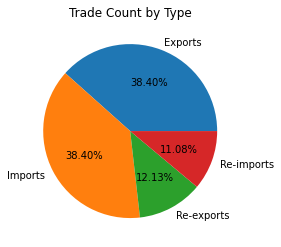

In [17]:
data \
    .groupby('Trade Flow')["Trade Flow"].count() \
    .plot(kind="pie", autopct="%.2f%%", startangle=0, ylabel="", xlabel="")
plt.title("Trade Count by Type")

<AxesSubplot:>

Text(0.5, 1.0, 'Trade Count by Type')

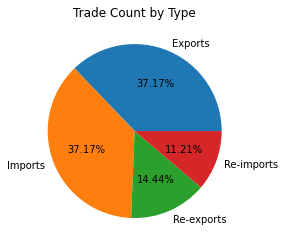

In [22]:
data[data["Reporter"].isin(data_lowest_50b.index)] \
    .groupby('Trade Flow')["Trade Flow"].count() \
    .plot(kind="pie", autopct="%.2f%%", startangle=0, ylabel="", xlabel="")
plt.title("Trade Count by Type")

Not much has changed really. The change of percentage for imports-exports is barely noticeable.

However, I am curious to see how each country compares when it comes to amounts of imports-exports.

To have a clearer picture, we will remove the re-imports and re-exports from the graph.

<AxesSubplot:xlabel='Reporter'>

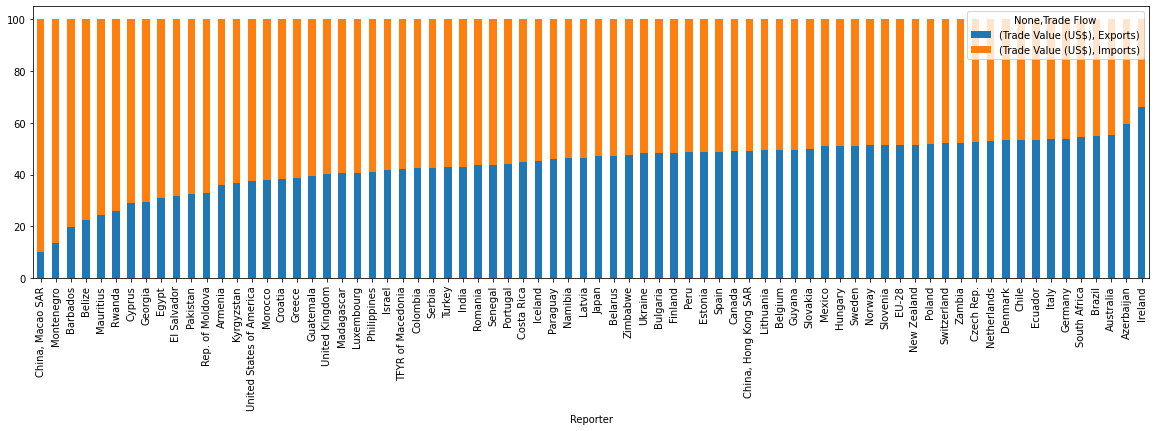

In [121]:
data_import_export_ratio = data[data["Trade Flow"].isin(["Imports", "Exports"])] \
    .groupby(["Reporter", "Trade Flow"]).agg({"Trade Value (US$)": sum}) \
    .groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).unstack().fillna(0) \
    .sort_values(by=('Trade Value (US$)', 'Imports'), ascending=False)

data_import_export_ratio.plot(kind="bar", stacked=True, figsize=(20, 5))

Pretty interesting! The more a country exports, the less it imports (and vice-versa)!

In [158]:
pd.concat([data_import_export_ratio.head(1), data_import_export_ratio.tail(1)])

Trade Value (US$)           
Trade Flow                 Exports    Imports
Reporter                                     
China, Macao SAR         10.126165  89.873835
Ireland                  66.105224  33.894776